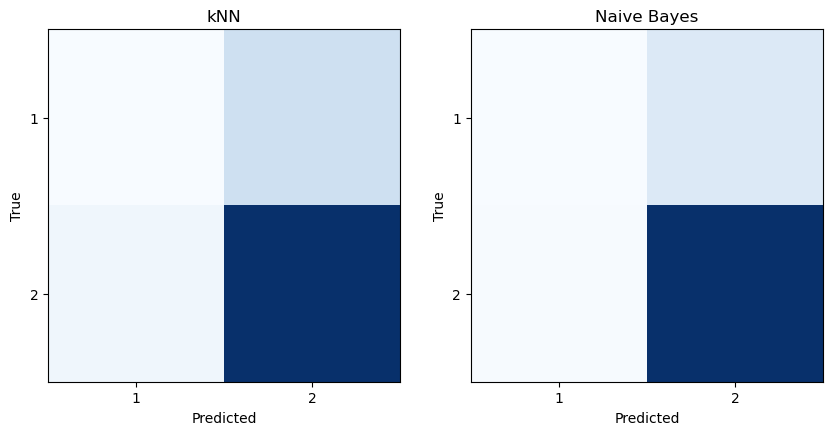

In [1]:
# Using sklearn, considering a 10-fold stratified cross validation (random=0), plot the cumulative
# testing confusion matrices of 𝑘NN (uniform weights, 𝑘 = 5, Euclidean distance) and Naïve Bayes
# (Gaussian assumption). Use all remaining classifier parameters as default.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from scipy.io.arff import loadarff

# Load data
data = loadarff('data/pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

# Split data into features and labels
X = df.drop('class', axis=1)
y = df['class']

# Create 10-fold stratified cross validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Create classifier
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
gnb = GaussianNB()

# Create confusion matrices
knn_cm = np.zeros((2, 2))
gnb_cm = np.zeros((2, 2))

# Iterate over folds
for train_index, test_index in skf.split(X, y):
    # Split data into training and testing
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit classifiers
    knn.fit(X_train, y_train)
    gnb.fit(X_train, y_train)

    # Predict labels
    y_pred_knn = knn.predict(X_test)
    y_pred_gnb = gnb.predict(X_test)

    # Update confusion matrices
    knn_cm += confusion_matrix(y_test, y_pred_knn)
    gnb_cm += confusion_matrix(y_test, y_pred_gnb)

# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(knn_cm, cmap='Blues')
ax[0].set_title('kNN')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')
ax[0].set_xticks([0, 1])
ax[0].set_yticks([0, 1])
ax[0].set_xticklabels(['1', '2'])
ax[0].set_yticklabels(['1', '2'])
ax[0].grid(False)
ax[1].imshow(gnb_cm, cmap='Blues')
ax[1].set_title('Naive Bayes')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')
ax[1].set_xticks([0, 1])
ax[1].set_yticks([0, 1])
ax[1].set_xticklabels(['1', '2'])
ax[1].set_yticklabels(['1', '2'])
ax[1].grid(False)
plt.show()